<style>
  h1, h2, h3, h4, h5, h6 {
    margin-top: 10px;
    margin-bottom: 10px;
  }
</style>

## **Project:** Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### **Student Name:** Brett Neely
#### **GitHub Link:** https://github.com/bncodes19/web-scraping
#### **Course:** Web Mining and Applied NLP (44-620)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Imports
from bs4 import BeautifulSoup
import requests
import html5lib
import pickle
import matplotlib.pyplot as plt
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

#### 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
# Store the website URL in a variable and use requests to scrape
URL = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'
response = requests.get(URL)

In [3]:
article = response.text
file_path = "article.pkl"

# Save the contents of the response text to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(article, file)

#### 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
soup = BeautifulSoup(response.content, 'html5lib')

# Find the article in the HTML (inspect the start of the article for the class)
article_text = soup.find("div", class_="entry-content")

# Clean the article text
article_cleaned = article_text.get_text(strip=True, separator="\n")
print(article_cleaned)

When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this way

#### 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Process the cleaned article
doc = nlp(article_cleaned)

# Store the tokens in a variable and remove punctuation, stop words, and non-alphanumerics
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
tokens_freq = Counter(tokens)
most_common_tokens = tokens_freq.most_common(5)

for tokens, freq in most_common_tokens:
    print(f"Token: {tokens}, Count: {freq}")

Token: laser, Count: 30
Token: headlights, Count: 17
Token: technology, Count: 10
Token: headlight, Count: 10
Token: led, Count: 10


#### 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# Reuse pipeline from previous question

# Store the lemmas in a variable and remove punctuation, stop words, and non-alphanumerics
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
lemmas_freq = Counter(lemmas)
most_common_lemmas = lemmas_freq.most_common(5)

for lemmas, freq in most_common_lemmas:
    print(f"Lemma: {lemmas}, Count: {freq}")

Lemma: laser, Count: 35
Lemma: headlight, Count: 26
Lemma: beam, Count: 12
Lemma: technology, Count: 10
Lemma: led, Count: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [7]:
# Score sentence by token

def score_sentence_by_token(sentence, interesting_token):
    doc = nlp(sentence)
    interesting_token = [word.lower() for word in interesting_token]
    token_count = sum(1 for token in doc if token.text.lower() in interesting_token)
    total_tokens = len([token for token in doc if token.is_alpha])
    if total_tokens == 0:
        return 0
    return round(token_count / total_tokens, 2)

seventh_sentence = list(doc.sents)[7].text
interesting_token = ['laser', 'automobile', 'image']

print(f"""The score for the following sentence is {score_sentence_by_token(seventh_sentence,interesting_token)}
'{seventh_sentence}'""")

The score for the following sentence is 0.17
'The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.'


In [8]:
# Score sentence by lemma

def score_sentence_by_lemma(sentence, interesting_lemma):
    doc = nlp(sentence)
    interesting_lemma = [word.lower() for word in interesting_lemma]
    lemma_count = sum(1 for token in doc if token.text.lower() in interesting_lemma)
    total_lemma = len([token for token in doc if token.is_alpha])
    if total_lemma == 0:
        return 0
    return round(lemma_count / total_lemma, 2)

tenth_sentence = list(doc.sents)[10].text
interesting_lemma = ['laser', 'solid', 'headlight']

print(f"""The score for the following sentence is {score_sentence_by_lemma(tenth_sentence,interesting_lemma)}
'{tenth_sentence}'""")

The score for the following sentence is 0.25
'Instead, laser headlights consist of one or more solid state laser diodes mounted inside the headlight.'


#### 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

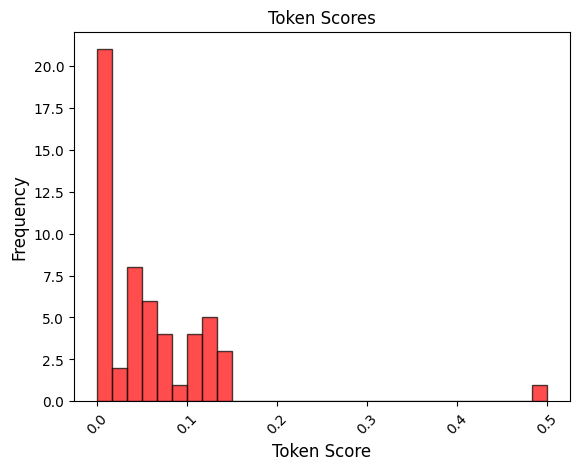

In [9]:
interesting_tokens = ['laser', 'beam', 'engineer', 'technology', 'home']

doc = nlp(article_cleaned)
token_scores = [score_sentence_by_token(sentence.text, interesting_tokens) for sentence in doc.sents]

plt.hist(token_scores, bins=30, color='red', edgecolor='black', alpha=0.7)
# Titles and labels
plt.title('Token Scores')
plt.xlabel('Token Score', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')
plt.xticks(fontsize=10, rotation=45, color='black')
plt.yticks(fontsize=10, color='black')
plt.show()

# The most common range of scores is < 5%

#### 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

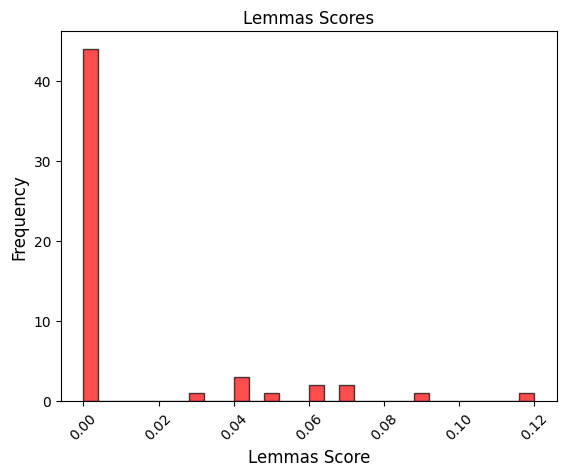

In [10]:
interesting_lemmas = ['image', 'futuristic', 'led', 'develop', 'blue', 'test']

doc = nlp(article_cleaned)
lemmas_scores = [score_sentence_by_lemma(sentence.text, interesting_lemmas) for sentence in doc.sents]

plt.hist(lemmas_scores, bins=30, color='red', edgecolor='black', alpha=0.7)
# Titles and labels
plt.title('Lemmas Scores')
plt.xlabel('Lemmas Score', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')
plt.xticks(fontsize=10, rotation=45, color='black')
plt.yticks(fontsize=10, color='black')
plt.show()

# The most common range of scores is < 5%

#### 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

We could use this variable to get only nouns. This would replace the tokens or lemmas variable in question 3 + 4.

nouns = [token.text for token in doc if token.pos_ in ['NOUN']]